Patrick BROCKMANN - LSCE (Climate and Environment Sciences Laboratory)<br>
<img align="left" width="40%" src="http://www.lsce.ipsl.fr/Css/img/banniere_LSCE_75.png" \><br><br>
<hr>

## Read FIDAS files

In [1]:
import datetime
import pandas as pd

In [2]:
dates = [datetime.date.today() + datetime.timedelta(days=i) for i in range(-6, 1, 1)]
dates

[datetime.date(2016, 12, 9),
 datetime.date(2016, 12, 10),
 datetime.date(2016, 12, 11),
 datetime.date(2016, 12, 12),
 datetime.date(2016, 12, 13),
 datetime.date(2016, 12, 14),
 datetime.date(2016, 12, 15)]

In [3]:
df = pd.DataFrame()
for date in dates:
    fileIn = "DATA4LSCE/GIF_" + date.strftime("%Y%m%d") + "_FIDAS_0109.0a"
    print "Reading ", fileIn
    df = df.append(pd.read_csv(fileIn, sep='\t'))

df = df.rename(columns=lambda x: x.strip())            # remove leading space
print df.columns

df['date'] = pd.to_datetime(df['date     time'], format='%Y-%m-%d %H:%M:%S')    # first column is 'date time'

df = df.set_index('date')
df = df.sort_index()
df = df.drop_duplicates()
print len(df)

Reading  DATA4LSCE/GIF_20161209_FIDAS_0109.0a
Reading  DATA4LSCE/GIF_20161210_FIDAS_0109.0a
Reading  DATA4LSCE/GIF_20161211_FIDAS_0109.0a
Reading  DATA4LSCE/GIF_20161212_FIDAS_0109.0a
Reading  DATA4LSCE/GIF_20161213_FIDAS_0109.0a
Reading  DATA4LSCE/GIF_20161214_FIDAS_0109.0a
Reading  DATA4LSCE/GIF_20161215_FIDAS_0109.0a
Index([u'date     time', u'PM1', u'PM2.5', u'PM4', u'PM10', u'PM-total',
       u'Concentration', u'Rh', u'AT', u'AP', u'flag-Flow',
       u'flag-Coincidence', u'flag-Pumps', u'flag-Weather_Station',
       u'flag-IADS', u'flag-Calibration', u'flag-LED', u'flag-Operating_Mode',
       u'flag-device_status', u'Flowrate', u'Velocity', u'Pumps',
       u'Coincidence', u'Pump_Output', u'IADS-T', u'Raw_Channel_Deviation',
       u'LED-T', u'X1', u'X2', u'X3', u'X4', u'X5', u'X6', u'X7', u'X8', u'X9',
       u'X10', u'X11', u'X12'],
      dtype='object')
9122


In [4]:
df.head()

,date time,PM1,PM2.5,PM4,PM10,PM-total,Concentration,Rh,AT,AP,...,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
date,,,,,,,,,,,,,,,,,,,,,
2016-12-09 00:00:43,2016-12-09 00:00:43,23.031524,24.644228,25.694217,27.542332,30.488687,617.074097,90.985577,5.695894,1011.730774,...,13.30,10.47,19.05,4.81,9.67,1.45,44.88,41.1,2.15,24.40
2016-12-09 00:01:44,2016-12-09 00:01:44,23.014951,24.625897,25.668706,27.651902,30.864679,631.578735,91.028312,5.689179,1011.689575,...,13.48,10.43,20.07,4.80,9.64,1.48,44.89,41.1,2.04,24.40
2016-12-09 00:02:44,2016-12-09 00:02:44,22.987220,24.583786,25.601994,27.830885,31.578069,646.915894,91.028312,5.689179,1011.689575,...,13.64,10.42,20.70,4.81,9.64,1.51,44.90,41.1,2.06,24.44
2016-12-09 00:03:44,2016-12-09 00:03:44,22.974412,24.555514,25.583001,27.594710,31.002322,637.992187,91.087835,5.678686,1011.675842,...,13.36,10.40,19.90,4.81,9.64,1.22,44.93,41.1,2.07,24.44
2016-12-09 00:04:44,2016-12-09 00:04:44,22.980114,24.564767,25.609041,27.568979,30.683838,634.647095,91.087835,5.678686,1011.675842,...,13.43,10.43,19.60,4.81,9.62,1.60,44.90,41.1,1.90,24.44


In [5]:
df.index

DatetimeIndex(['2016-12-09 00:00:43', '2016-12-09 00:01:44',
               '2016-12-09 00:02:44', '2016-12-09 00:03:44',
               '2016-12-09 00:04:44', '2016-12-09 00:05:44',
               '2016-12-09 00:06:44', '2016-12-09 00:07:43',
               '2016-12-09 00:08:43', '2016-12-09 00:09:44',
               ...
               '2016-12-15 07:52:44', '2016-12-15 07:53:44',
               '2016-12-15 07:54:43', '2016-12-15 07:55:43',
               '2016-12-15 07:56:44', '2016-12-15 07:57:44',
               '2016-12-15 07:58:44', '2016-12-15 07:59:44',
               '2016-12-15 08:00:44', '2016-12-15 08:01:44'],
              dtype='datetime64[ns]', name=u'date', length=9122, freq=None)

### colors

In [6]:
# from https://github.com/mbostock/d3/wiki/Ordinal-Scales\n",
#colors = ["#1f77b4","#ff7f0e","#2ca02c","#d62728","#9467bd","#8c564b","#e377c2","#7f7f7f","#bcbd22","#17bec"]
colors = ["#8c564b","#1f77b4","#2ca02c","#d62728","#9467bd","#e377c2","#7f7f7f","#bcbd22","#17bec"]

## bokeh

In [7]:
import bokeh.plotting as bk
from bokeh.plotting import figure, output_file, show, save, ColumnDataSource
from bokeh.models import DatetimeTickFormatter
from bokeh.models import HoverTool, BoxAnnotation, Span, Label
from bokeh.palettes import Set1_8, Set2_8
from bokeh.models import Range1d

bk.output_notebook()

Loading BokehJS ...

In [12]:
#output_file("file.html", title='a title', mode='inline')

source = ColumnDataSource(data=dict(
        date = df.index,
        datestr = df['date     time'],
        varPM10 = df['PM10'],
        varPM2_5 = df['PM2.5']) )

hover1 = HoverTool(tooltips=[("date, PM10, PM2.5", "(@datestr, @varPM10, @varPM2_5)")])
tools1 = ["pan,resize,wheel_zoom,crosshair",hover1,"reset,save"]

plot1 = figure(plot_width=800, plot_height=500, x_axis_type="datetime", min_border=10, tools=tools1)
formats = {'years': ["%Y"], 'months': ["%b-%y"],'days': ["%d-%b-%y"], 'hours': ["%H:%M"]}
plot1.axis[0].formatter = DatetimeTickFormatter(years="%Y", months="%b-%y", days="%d-%b-%y", hours="%H:%M")

#for i,var in enumerate(['PM-total', 'PM10', 'PM4', 'PM2.5', 'PM1']):
#for i,var in enumerate(['PM10', 'PM2.5']):
#    plot1.line(df.index, df[var], line_alpha=1.0, line_join="round", 
#                    line_color=colors[i], line_width=2, legend=var)
    
plot1.line('date', 'varPM10', source=source, line_alpha=1.0, line_join="round", 
                       line_color=colors[0], line_width=1, legend='PM10')
plot1.line('date', 'varPM2_5', source=source, line_alpha=1.0, line_join="round", 
                       line_color=colors[1], line_width=1, legend='PM2.5')

plot1.add_layout(Span(dimension='width', location=50, line_color='orange', line_dash='dashed', line_width=2))
plot1.add_layout(Span(dimension='width', location=80, line_color='red', line_dash='dashed', line_width=2))

plot1.add_layout(Label(x=40, y=80, x_units='screen', text="Seuil d'alerte PM10", 
                           text_font_size='12px', text_font_style='italic', text_color='gray'))
plot1.add_layout(Label(x=40, y=50, x_units='screen', text="Seuil d'information PM10", 
                           text_font_size='12px', text_font_style='italic', text_color='gray'))

plot1.title.text = 'LSCE FIDAS'
plot1.legend.location = 'top_left'
plot1.y_range = Range1d(0, 100)

show(plot1)

# Save an HTML file
#save(plot1)

## matplotlib

In [13]:
import datetime
import numpy as np
import matplotlib

# If not from a notebook
#matplotlib.use('Agg')

import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, HourLocator, MinuteLocator, DateFormatter
import matplotlib.dates as mdates

matplotlib.rcParams['font.family'] = 'DejaVu Sans'

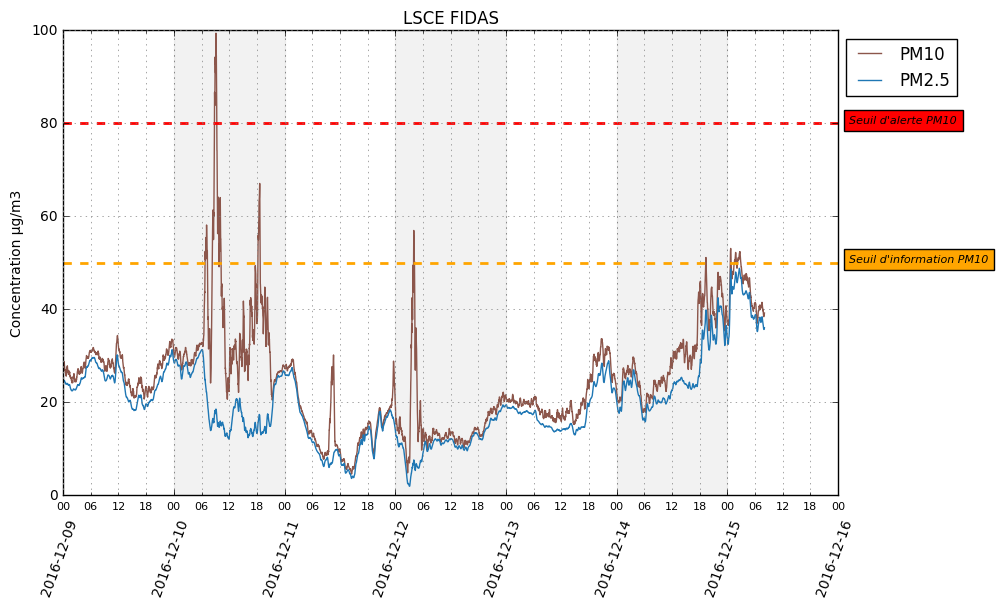

In [33]:
fig, ax = plt.subplots(figsize=(10,6))

#for i,var in enumerate(['PM-total', 'PM10', 'PM4', 'PM2.5', 'PM1']):
for i,var in enumerate(['PM10', 'PM2.5']):
    plt.plot(df.index, df[var], linewidth=1, label=var, color=colors[i])
    
#ax.xaxis.set_major_locator(HourLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d    '))
ax.xaxis.set_major_locator(DayLocator(interval=1))

#ax.xaxis.set_minor_formatter(DateFormatter('%H'))
ax.xaxis.set_minor_locator(HourLocator(interval=6))
ax.xaxis.set_minor_formatter(DateFormatter('%H'))

x = ax.get_xlim()
ax.set_xlim([np.floor(x[0]), np.ceil(x[1])])
y = ax.get_ylim()
#ax.set_ylim([0, y[1]])
ax.set_ylim([0, 100])

xplace = np.ceil(x[1])+0.1
ax.axhline(y=80, color='red', linewidth=2, linestyle='dashed')
ax.text(xplace, 80, "Seuil d'alerte PM10", ha='left', fontsize=8, style='italic', bbox=dict(facecolor='red'))

ax.axhline(y=50, color='orange', linewidth=2, linestyle='dashed')
ax.text(xplace, 50, "Seuil d'information PM10", ha='left', fontsize=8, style='italic', bbox=dict(facecolor='orange'))

plt.legend(loc=2, bbox_to_anchor=(1.0, 1.0))
plt.title("LSCE FIDAS")
#plt.xlabel('Time')
plt.ylabel(u'Concentration μg/m3')
plt.grid(color='gray', axis='both', which='both')

labels = ax.get_xmajorticklabels()
plt.setp(labels, rotation=70, fontsize=10)
labels = ax.get_xminorticklabels()
plt.setp(labels, fontsize=8)

startDate = int(np.floor(x[0])%2)
for i in np.arange(startDate, len(dates), 2):
    #print dates[i]
    plt.axvspan(dates[i], dates[i]+datetime.timedelta(days=1), color='gray', alpha=0.1)

#plt.gcf().autofmt_xdate()

plt.savefig("GIF_FIDAS_0109.0a.png", bbox_inches='tight', dpi=100)

plt.show()

plt.close()